### Loading and prerequesites

In [63]:
import spacy
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
VARIANT = "LARGE"

In [65]:
df = pd.read_pickle("../Data/df_raw.pkl")
if VARIANT == "SMALL":
    df = df.head(50)
elif VARIANT == "MEDIUM":
    df = df.head(300)

### General overview over the dataset

In [66]:
df = pd.read_pickle("../Data/df.pkl")
df

,title,publication_date,publication_year,publisher,text
0,Angst vor dem «harten Brexit» auf der Insel - ...,2017-01-15,2017,AP Deutsch,Wenn Großbritannien Ende März den Ausstieg aus...
1,Fleischindustrie wehrt sich gegen Marketing fü...,2018-06-21,2018,AP Deutsch,Fleisch aus dem Labor ist noch eine Zukunftsvi...
2,Der AP-Überblick am Nachmittag,2018-06-21,2018,AP Deutsch,Die AP Weltnachrichten haben heute unter ander...
3,Laborfleisch soll in drei Jahren auf die Telle...,2018-07-17,2018,AP Deutsch,Maastricht (AP) - Das niederländische Unterneh...
4,Israelische Forscher wollen künstliche Steaks ...,2019-02-26,2019,AP Deutsch,"Die Weltbevölkerung wächst, die Nachfrage nach..."
...,...,...,...,...,...
6774,Kein Titel,2023-02-21,2023,ZEIT Wissen,6 Am anfang drei Fragen 1. Können wir andere m...
6775,Leben und schmecken lassen,2023-02-21,2023,ZEIT Wissen,"Ein saftiges Filet, für das kein Huhn sterben ..."
6776,ABSCHIED VOM ALTEN ITALIEN,2009-05-13,2009,ZEIT Wissen,John Dickie: »Delizia! Die Italiener und ihre...
6777,Essen aus dem Labor,2009-12-08,2009,ZEIT Wissen,Es ist der letzte Tag auf der Lebensmittelmess...


In [67]:
print("First Textual Overview of the Dataset:")
print("------------------------")
print("First Publication Year:", df['publication_date'].min().year)
print("Last Publication Year:", df['publication_date'].max().year)
print("Total Number of Publications:", len(df))
print("\nNumber of Publications per Year:")
print(df['publication_year'].value_counts().sort_index())
print("\nNumber of Publications per Publisher:")
print(df['publisher'].value_counts())

First Textual Overview of the Dataset:
------------------------
First Publication Year: 1992
Last Publication Year: 2023
Total Number of Publications: 6779

Number of Publications per Year:
publication_year
1992       3
1993       6
1994      20
1995      20
1996      29
1997      49
1998      61
1999      99
2000     100
2001      74
2002      77
2003     157
2004     338
2005     201
2006     155
2007     132
2008     197
2009     166
2010     101
2011     126
2012     134
2013     169
2014     258
2015     240
2016     291
2017     174
2018     409
2019     604
2020     275
2021     474
2022     539
2023    1101
Name: count, dtype: int64

Number of Publications per Publisher:
publisher
taz, die tageszeitung              436
Lebensmittel Zeitung               386
AWP Premium Swiss News (German)    230
Frankfurter Rundschau              193
dpa-AFX ProFeed                    186
                                  ... 
FD (Fair Disclosure) Wire            1
Global Data Point            

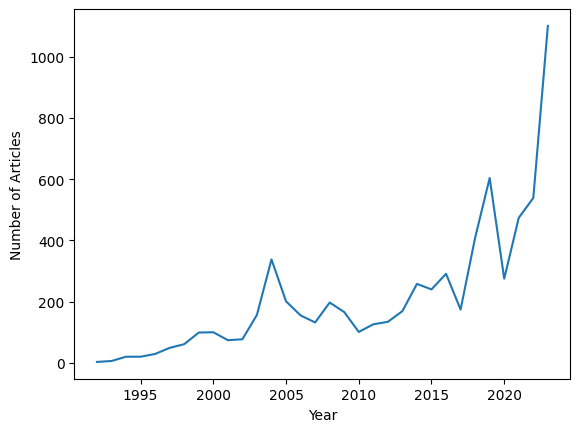

In [68]:
# Overview over yearly publications
df['publication_year'].value_counts().sort_index().plot(legend = None)
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.savefig('../Visuals/number_of_articles_per_year.png')
plt.show()

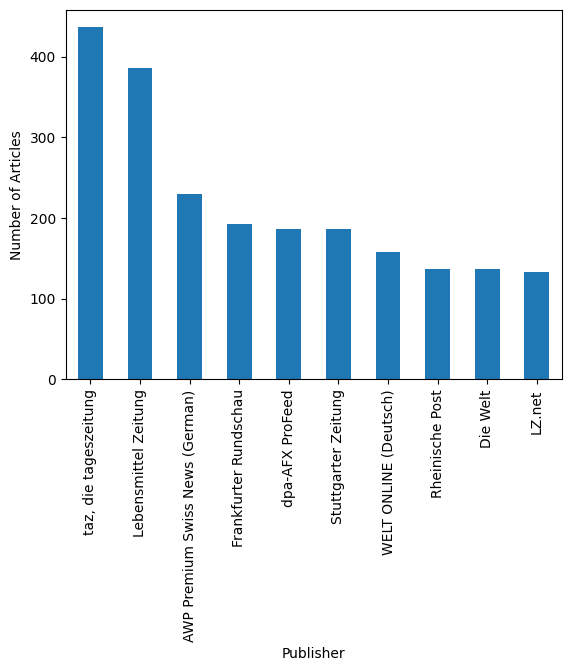

In [73]:
# Overview over publishers with most publicaations
df['publisher'].value_counts().nlargest(10).plot(legend = None, kind='bar',)
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.savefig('../Visuals/top_10_publishers.png')
plt.show()

### SpaCy Initialisation

In [70]:
nlp = spacy.load("de_core_news_sm")

In [71]:
df

,title,publication_date,publication_year,publisher,text
0,Angst vor dem «harten Brexit» auf der Insel - ...,2017-01-15,2017,AP Deutsch,Wenn Großbritannien Ende März den Ausstieg aus...
1,Fleischindustrie wehrt sich gegen Marketing fü...,2018-06-21,2018,AP Deutsch,Fleisch aus dem Labor ist noch eine Zukunftsvi...
2,Der AP-Überblick am Nachmittag,2018-06-21,2018,AP Deutsch,Die AP Weltnachrichten haben heute unter ander...
3,Laborfleisch soll in drei Jahren auf die Telle...,2018-07-17,2018,AP Deutsch,Maastricht (AP) - Das niederländische Unterneh...
4,Israelische Forscher wollen künstliche Steaks ...,2019-02-26,2019,AP Deutsch,"Die Weltbevölkerung wächst, die Nachfrage nach..."
...,...,...,...,...,...
6774,Kein Titel,2023-02-21,2023,ZEIT Wissen,6 Am anfang drei Fragen 1. Können wir andere m...
6775,Leben und schmecken lassen,2023-02-21,2023,ZEIT Wissen,"Ein saftiges Filet, für das kein Huhn sterben ..."
6776,ABSCHIED VOM ALTEN ITALIEN,2009-05-13,2009,ZEIT Wissen,John Dickie: »Delizia! Die Italiener und ihre...
6777,Essen aus dem Labor,2009-12-08,2009,ZEIT Wissen,Es ist der letzte Tag auf der Lebensmittelmess...


### Questions

In [72]:
def count_questions(text):
    doc = nlp(text)
    return sum(1 for sent in doc.sents if sent.text.strip().endswith('?'))

In [47]:
df['questions_count'] = df['text'].apply(count_questions)

In [48]:
df
df_sorted = df.sort_values(by='questions_count', ascending=False)
df_sorted

,title,publication_date,publication_year,publisher,text,questions_count
2165,Das neue Fleisch,2019-08-31,2019,Focus Magazin,Text von Corinna Baier und Elisabeth Krafft Se...,71
3103,None,2023-08-10,2023,Lebensmittel Zeitung,LZ: Unser heutiges Thema ist brandaktuell und ...,68
492,"Cornflakes classic, Cornflakes mit Schoko und ...",2000-08-26,2000,None,"Von Bohlen: Lassen Sie die Tür ruhig offen, ic...",46
2160,Schöpfung auf Speed,2018-07-28,2018,Focus Magazin,"Text von Aleksandra Janevska, Kurt-Martin Maye...",42
5274,"Vegan, aber ?Fleischerei??",2023-01-27,2023,Sächsische Zeitung Regionalausgaben,Schnitzel- und Fleischkäsebrötchen auf die Han...,41
...,...,...,...,...,...,...
3743,None,1997-11-25,1997,Neue Zuercher Zeitung,"""Das Allergierisiko von gentechnisch veraender...",0
3744,None,1997-11-25,1997,Neue Zuercher Zeitung,"Wien, 24. Nov. (dpa) In Oesterreich koennen Le...",0
3745,None,1997-11-20,1997,Neue Zuercher Zeitung,Die Schweizer Bevoelkerung steht der Gentechno...,0
3746,None,1997-10-21,1997,Neue Zuercher Zeitung,Die Haltung gegenueber gentechnisch veraendert...,0


In [62]:
# Group by year and calculate the total number of questions and total number of articles for each year
df_grouped = df.groupby('publication_year').agg({'questions_count': 'sum', 'text': 'count'})

# Calculate the ratio of questions to total articles for each year
df_grouped['questions_ratio'] = df_grouped['questions_count'] / df_grouped['text']

# Visualize the results

df_grouped.plot(legend = None)
plt.xlabel('Year')
plt.ylabel('Ratio of Questions to Articles')
plt.savefig('../Visuals/question_to_article_ratio.png')
plt.show()

KeyError: "Column(s) ['questions_count'] do not exist"

### Pronouns

In [ ]:
nlp = spacy.load("de_core_news_sm")
df["spacy_sm"] = df["Text"].apply(lambda x: nlp(x))

In [6]:
du_variants = ["Du", "du", "Dich", "dich," "Dein", "dein", "Deine", "deine", "Deines" , "deines", "Deiner", "deiner", "Dir", "dir"]
ihr_variants = ["Ihr", "ihr", "Euch", "euch", "Euer", "euer", "Ihre", "ihre"]

In [7]:
df["count_du"] = 0
df["count_ihr"] = 0
df["count_du_ihr"] = 0

for index in df.index:
    du = 0
    ihr = 0
    for token in df["spacy_sm"][index]:
        if token.text in du_variants:
            du += 1
        if token.text in ihr_variants:
            ihr += 1
    df.loc[index, "count_du"] = du
    df.loc[index, "count_ihr"] = ihr
    du_ihr = du + ihr
    df.loc[index, "count_du_ihr"] = du_ihr

In [8]:
df

,Title,Published Date,Publisher,Text,spacy_sm,count_du,count_ihr,count_du_ihr
0,Angst vor dem «harten Brexit» auf der Insel - ...,2017-01-15,AP Deutsch,Wenn Großbritannien Ende März den Ausstieg aus...,"(Wenn, Großbritannien, Ende, März, den, Aussti...",0,2,2
1,Fleischindustrie wehrt sich gegen Marketing fü...,2018-06-21,AP Deutsch,Fleisch aus dem Labor ist noch eine Zukunftsvi...,"(Fleisch, aus, dem, Labor, ist, noch, eine, Zu...",0,1,1
2,Der AP-Überblick am Nachmittag,2018-06-21,AP Deutsch,Die AP Weltnachrichten haben heute unter ander...,"(Die, AP, Weltnachrichten, haben, heute, unter...",0,2,2
3,Laborfleisch soll in drei Jahren auf die Telle...,2018-07-17,AP Deutsch,Maastricht (AP) - Das niederländische Unterneh...,"(Maastricht, (, AP, ), -, Das, niederländische...",0,0,0
4,Israelische Forscher wollen künstliche Steaks ...,2019-02-26,AP Deutsch,"Die Weltbevölkerung wächst, die Nachfrage nach...","(Die, Weltbevölkerung, wächst, ,, die, Nachfra...",0,0,0
...,...,...,...,...,...,...,...,...
6774,Kein Titel,2023-02-21,ZEIT Wissen,6 Am anfang drei Fragen 1. Können wir andere m...,"(6, Am, anfang, drei, Fragen, 1., Können, wir,...",1,0,1
6775,Leben und schmecken lassen,2023-02-21,ZEIT Wissen,"Ein saftiges Filet, für das kein Huhn sterben ...","(Ein, saftiges, Filet, ,, für, das, kein, Huhn...",0,0,0
6776,ABSCHIED VOM ALTEN ITALIEN,2009-05-13,ZEIT Wissen,John Dickie: »Delizia! Die Italiener und ihre...,"(John, Dickie, :, », Delizia, !, Die, Italiene...",0,3,3
6777,Essen aus dem Labor,2009-12-08,ZEIT Wissen,Es ist der letzte Tag auf der Lebensmittelmess...,"(Es, ist, der, letzte, Tag, auf, der, Lebensmi...",0,6,6


In [19]:
years = []
for i in range(1992, 2024):
    years.append(i)

In [20]:
df_yearly_overview = pd.DataFrame(years, columns=["year"])
df_yearly_overview["publication_count"] = 0
df_yearly_overview["count_du"] = 0
df_yearly_overview["count_ihr"] = 0
df_yearly_overview["count_du_ihr"] = 0
df_yearly_overview.set_index("year", inplace=True)

In [21]:
for i in range(len(df)):
    current_year = int(df.iloc[i]["Published Date"].split("-")[0])
    df_yearly_overview.loc[current_year, "publication_count"] = df_yearly_overview.loc[current_year]["publication_count"] + 1
    df_yearly_overview.loc[current_year, "count_du"] += df.loc[i, "count_du"]
    df_yearly_overview.loc[current_year, "count_ihr"] += df.loc[i, "count_ihr"]
    df_yearly_overview.loc[current_year, "count_du_ihr"] += df.loc[i, "count_du_ihr"]

In [22]:
df_yearly_overview

,publication_count,count_du,count_ihr,count_du_ihr
year,,,,
1992,3,0,2,2
1993,6,0,8,8
1994,20,0,33,33
1995,20,2,12,14
1996,29,0,14,14
1997,49,0,50,50
1998,61,16,61,77
1999,99,4,129,133
2000,100,5,146,151


In [23]:
df_yearly_overview["count_du_per_publication"] = 0.0
df_yearly_overview["count_ihr_per_publication"] = 0.0
df_yearly_overview["count_du_ihr_per_publication"] = 0.0

In [32]:
index_list = df_yearly_overview.index.to_list()
for i in index_list:
    df_yearly_overview.loc[i, "count_du_per_publication"] = df_yearly_overview.loc[i, "count_du"] / df_yearly_overview.loc[i, "publication_count"]
    df_yearly_overview.loc[i, "count_ihr_per_publication"] = df_yearly_overview.loc[i, "count_ihr"] / df_yearly_overview.loc[i, "publication_count"]
    df_yearly_overview.loc[i, "count_du_ihr_per_publication"] = df_yearly_overview.loc[i, "count_du_ihr"] / df_yearly_overview.loc[i, "publication_count"]

In [61]:
df_yearly_overview

,publication_count,count_du,count_ihr,count_du_ihr,count_du_per_publication,count_ihr_per_publication,count_du_ihr_per_publication
year,,,,,,,
1992,3,0,2,2,0.000000,0.666667,0.666667
1993,6,0,8,8,0.000000,1.333333,1.333333
1994,20,0,33,33,0.000000,1.650000,1.650000
1995,20,2,12,14,0.100000,0.600000,0.700000
1996,29,0,14,14,0.000000,0.482759,0.482759
1997,49,0,50,50,0.000000,1.020408,1.020408
1998,61,16,61,77,0.262295,1.000000,1.262295
1999,99,4,129,133,0.040404,1.303030,1.343434
2000,100,5,146,151,0.050000,1.460000,1.510000


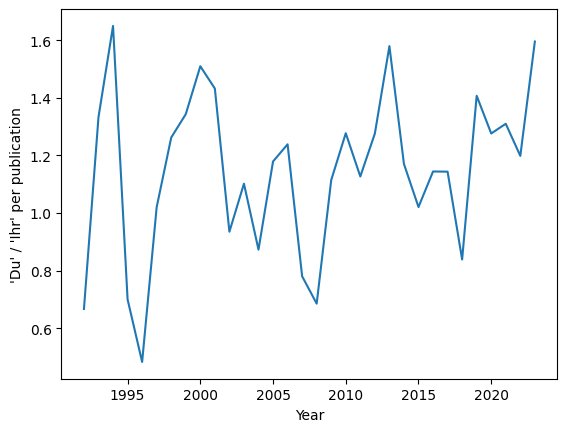

In [66]:
df_yearly_overview.plot(y = "count_du_ihr_per_publication", legend = None)
plt.xlabel('Year')
plt.ylabel('\'Du\' / \'Ihr\' per publication')
plt.savefig('../Visuals/count_du_ihr_per_publication.png')
plt.show()

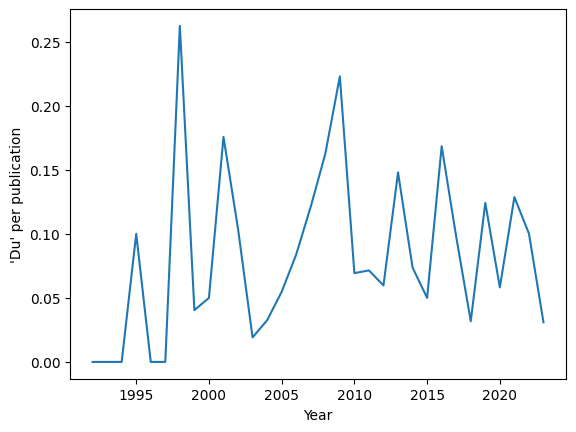

In [65]:
df_yearly_overview.plot(y = "count_du_per_publication", legend = None)
plt.xlabel('Year')
plt.ylabel('\'Du\' per publication')
plt.savefig('../Visuals/count_du_per_publication.png')
plt.show()